In [136]:
import pandas as pd

# Load the datasets
bombay_weather = pd.read_csv('Datasets/Bombay.csv', index_col="date")

bombay_weather


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
date,,,,,,,,,,
1/1/2016,28.6,15.7,35.3,0.0,NaN,NaN,6.3,NaN,NaN,NaN
2/1/2016,26.9,15.0,33.2,0.0,NaN,NaN,5.5,NaN,NaN,NaN
3/1/2016,25.8,13.2,32.3,0.0,NaN,NaN,5.5,NaN,NaN,NaN
4/1/2016,27.1,14.0,34.0,0.0,NaN,NaN,6.4,NaN,1015.3,NaN
5/1/2016,27.3,14.8,32.6,0.0,NaN,NaN,5.8,NaN,1014.4,NaN
...,...,...,...,...,...,...,...,...,...,...
28/12/2023,27.8,21.6,34.0,0.0,NaN,44.0,8.7,NaN,1013.3,NaN
29/12/2023,28.1,21.4,34.0,0.0,NaN,26.0,7.1,NaN,1013.3,NaN
30/12/2023,27.9,21.6,33.0,0.0,NaN,140.0,7.5,NaN,1012.8,NaN


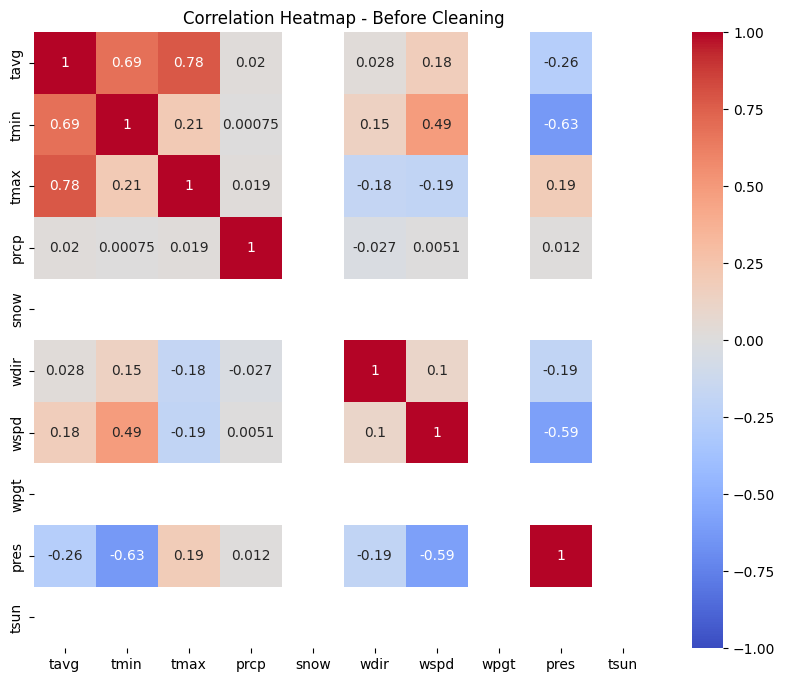

In [137]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix before cleaning
correlation_matrix_before = bombay_weather.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_before, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Before Cleaning")
plt.show()


In [138]:
bombay_weather.apply(pd.isnull).sum()

tavg       0
tmin       0
tmax       9
prcp     127
snow    2923
wdir     373
wspd      10
wpgt    2923
pres      83
tsun    2923
dtype: int64

In [139]:
null_pct = bombay_weather.apply(pd.isnull).sum()/bombay_weather.shape[0]
null_pct

tavg    0.000000
tmin    0.000000
tmax    0.003079
prcp    0.043449
snow    1.000000
wdir    0.127609
wspd    0.003421
wpgt    1.000000
pres    0.028395
tsun    1.000000
dtype: float64

In [140]:
valid_columns = bombay_weather.columns[null_pct < 0.05]
valid_columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres'], dtype='object')

In [141]:
bombay_weather = bombay_weather[valid_columns].copy()
bombay_weather

,tavg,tmin,tmax,prcp,wspd,pres
date,,,,,,
1/1/2016,28.6,15.7,35.3,0.0,6.3,NaN
2/1/2016,26.9,15.0,33.2,0.0,5.5,NaN
3/1/2016,25.8,13.2,32.3,0.0,5.5,NaN
4/1/2016,27.1,14.0,34.0,0.0,6.4,1015.3
5/1/2016,27.3,14.8,32.6,0.0,5.8,1014.4
...,...,...,...,...,...,...
28/12/2023,27.8,21.6,34.0,0.0,8.7,1013.3
29/12/2023,28.1,21.4,34.0,0.0,7.1,1013.3
30/12/2023,27.9,21.6,33.0,0.0,7.5,1012.8


In [142]:
bombay_weather['pres'] = bombay_weather['pres'].fillna(bombay_weather['pres'].mean())
bombay_weather['tmax'] = bombay_weather['tmax'].fillna(bombay_weather['tmax'].mean())
bombay_weather['prcp'] = bombay_weather['prcp'].fillna(bombay_weather['prcp'].mean())
bombay_weather['wspd'] = bombay_weather['wspd'].fillna(bombay_weather['wspd'].mean())


bombay_weather


,tavg,tmin,tmax,prcp,wspd,pres
date,,,,,,
1/1/2016,28.6,15.7,35.3,0.0,6.3,1008.763908
2/1/2016,26.9,15.0,33.2,0.0,5.5,1008.763908
3/1/2016,25.8,13.2,32.3,0.0,5.5,1008.763908
4/1/2016,27.1,14.0,34.0,0.0,6.4,1015.300000
5/1/2016,27.3,14.8,32.6,0.0,5.8,1014.400000
...,...,...,...,...,...,...
28/12/2023,27.8,21.6,34.0,0.0,8.7,1013.300000
29/12/2023,28.1,21.4,34.0,0.0,7.1,1013.300000
30/12/2023,27.9,21.6,33.0,0.0,7.5,1012.800000


In [143]:
bombay_weather.apply(pd.isnull).sum()

tavg    0
tmin    0
tmax    0
prcp    0
wspd    0
pres    0
dtype: int64

In [144]:

# Select only the numeric columns for calculating IQR
numeric_cols = bombay_weather.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = bombay_weather[numeric_cols].quantile(0.25)
Q3 = bombay_weather[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a filter to detect and remove outliers for numeric columns
outlier_filter = ~((bombay_weather[numeric_cols] < (Q1 - 1.5 * IQR)) | (bombay_weather[numeric_cols] > (Q3 + 1.5 * IQR)))

# Apply filter to remove rows with outliers in numeric columns
bombay_weather_no_outliers = bombay_weather[outlier_filter.all(axis=1)]

# Display to confirm outliers are removed
bombay_weather_no_outliers.shape


(2469, 6)

In [145]:
bombay_weather_no_outliers.to_csv('Bombay.csv', index="date")

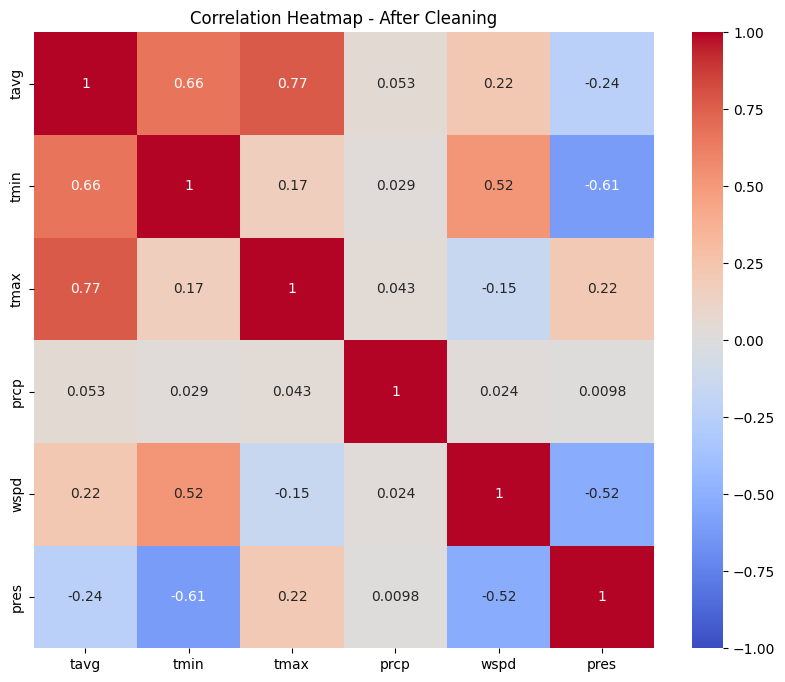

In [146]:
# Create a correlation matrix after cleaning
correlation_matrix_after = bombay_weather_no_outliers.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_after, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap - After Cleaning")
plt.show()


In [147]:
import numpy as np
from sklearn.model_selection import train_test_split

numeric_features = bombay_weather_no_outliers.select_dtypes(include=[np.number])



# Select only numeric columns for training (replace 'target_column' with the actual column name you're predicting)
X = numeric_features.drop(columns=['tmax', 'tmin'])  # Features (input)
y = numeric_features[['tmax', 'tmin']]  # Target (output)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1975, 4)
X_test shape: (494, 4)
y_train shape: (1975, 2)
y_test shape: (494, 2)


In [148]:
# Import the necessary scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers (we'll try both types)
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler to the features
X_train_scaled_std = standard_scaler.fit_transform(X_train)
X_test_scaled_std = standard_scaler.transform(X_test)

# Apply MinMaxScaler to the features
X_train_scaled_minmax = minmax_scaler.fit_transform(X_train)
X_test_scaled_minmax = minmax_scaler.transform(X_test)

# Check the results
print("Standard Scaled X_train (first 5 rows):\n", X_train_scaled_std[:5])
print("MinMax Scaled X_train (first 5 rows):\n", X_train_scaled_minmax[:5])


Standard Scaled X_train (first 5 rows):
 [[ 1.64915203 -0.28944124 -0.28283027  0.53869585]
 [-2.00649644  1.28426558  1.41743541  2.25249025]
 [ 0.19764455 -0.62325783 -0.51468468  0.29816331]
 [-0.07115313 -0.62325783  0.87644178  0.47856272]
 [ 1.16531621  0.97429302  0.14223615 -0.84436629]]
MinMax Scaled X_train (first 5 rows):
 [[0.83333333 0.07486631 0.39849624 0.65957447]
 [0.125      0.42780749 0.72932331 0.96276596]
 [0.55208333 0.         0.35338346 0.61702128]
 [0.5        0.         0.62406015 0.64893617]
 [0.73958333 0.35828877 0.48120301 0.41489362]]


In [149]:
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
linear_reg = LinearRegression()

# Train the model on Standard Scaled data
linear_reg.fit(X_train_scaled_std, y_train)

# Make predictions on the test set
y_pred_lr = linear_reg.predict(X_test_scaled_std)

# Evaluate the model
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression - R^2 Score:", r2_score(y_test, y_pred_lr))



Linear Regression - Mean Squared Error: 2.343995987783238
Linear Regression - R^2 Score: 0.721681471274944


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
#  Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Train the model on the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_regression_model.predict(X_test)

# Calculate MSE for tmin and tmax
mse_linear_tmin = mean_squared_error(y_test['tmin'], y_pred_linear[:, 1])
mse_linear_tmax = mean_squared_error(y_test['tmax'], y_pred_linear[:, 0])

# Calculate R² score for tmin and tmax
r2_linear_tmin = r2_score(y_test['tmin'], y_pred_linear[:, 1])
r2_linear_tmax = r2_score(y_test['tmax'], y_pred_linear[:, 0])

# Print the results for Linear Regression
print(f"Linear Regression - MSE for tmin: {mse_linear_tmin}")
print(f"Linear Regression - MSE for tmax: {mse_linear_tmax}")
print(f"Linear Regression - R² for tmin: {r2_linear_tmin}")
print(f"Linear Regression - R² for tmax: {r2_linear_tmax}")


Linear Regression - MSE for tmin: 3.368211036263816
Linear Regression - MSE for tmax: 1.3197809393026614
Linear Regression - R² for tmin: 0.6906934233827577
Linear Regression - R² for tmax: 0.7526695191671301


In [151]:
# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate MSE for tmin and tmax
mse_rf_tmin = mean_squared_error(y_test['tmin'], y_pred_rf[:, 1])
mse_rf_tmax = mean_squared_error(y_test['tmax'], y_pred_rf[:, 0])

# Calculate R² score for tmin and tmax
r2_rf_tmin = r2_score(y_test['tmin'], y_pred_rf[:, 1])
r2_rf_tmax = r2_score(y_test['tmax'], y_pred_rf[:, 0])

# Print the results for Random Forest
print(f"Random Forest - MSE for tmin: {mse_rf_tmin}")
print(f"Random Forest - MSE for tmax: {mse_rf_tmax}")
print(f"Random Forest - R² for tmin: {r2_rf_tmin}")
print(f"Random Forest - R² for tmax: {r2_rf_tmax}")


Random Forest - MSE for tmin: 3.283256338056678
Random Forest - MSE for tmax: 1.280723664899845
Random Forest - R² for tmin: 0.6984949080840099
Random Forest - R² for tmax: 0.7599889569392607


In [152]:
# Import the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on Standard Scaled data
rf_reg.fit(X_train_scaled_std, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test_scaled_std)

# Evaluate the model
print("Random Forest Regressor - Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest Regressor - R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor - Mean Squared Error: 2.2832088779528172
Random Forest Regressor - R^2 Score: 0.7290005228679001


In [153]:
# Define thresholds for weather classification
def classify_weather(row):
    if row['prcp'] > 0.1:
        return 'Rainy'
    elif row['wspd'] > 15:  # Example threshold for windy day
        return 'Windy'
    else:
        return 'Sunny'

# Apply the function to create a new 'weather_type' column
bombay_weather_no_outliers.loc[:, 'weather_type'] = bombay_weather_no_outliers.apply(classify_weather, axis=1)

# Display the counts for each weather type
print(bombay_weather_no_outliers['weather_type'].value_counts())
# Features (excluding the target and any non-numeric columns if applicable)
X_classification = bombay_weather_no_outliers.drop(columns=['weather_type'])

# Target (weather type)
y_classification = bombay_weather_no_outliers['weather_type']

# Split the data: 80% for training, 20% for testing
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

print(f"X_train_class shape: {X_train_class.shape}")
print(f"X_test_class shape: {X_test_class.shape}")
print(f"y_train_class shape: {y_train_class.shape}")
print(f"y_test_class shape: {y_test_class.shape}")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_class, y_train_class)

# Predict on the test data
y_pred_class = rf_classifier.predict(X_test_class)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class)}")
print(classification_report(y_test_class, y_pred_class))
# Save the DataFrame including the 'weather_type' column to a new CSV file
bombay_weather_no_outliers.to_csv('Bombay.csv', index=True)

print("CSV file with 'weather_type' column saved successfully.")



weather_type
Sunny    1267
Rainy    1115
Windy      87
Name: count, dtype: int64
X_train_class shape: (1975, 6)
X_test_class shape: (494, 6)
y_train_class shape: (1975,)
y_test_class shape: (494,)


/var/folders/c1/n9yc0w657wl6vvqk3m2y5txh0000gn/T/ipykernel_7446/2807111435.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bombay_weather_no_outliers.loc[:, 'weather_type'] = bombay_weather_no_outliers.apply(classify_weather, axis=1)


Accuracy: 1.0
              precision    recall  f1-score   support

       Rainy       1.00      1.00      1.00       229
       Sunny       1.00      1.00      1.00       235
       Windy       1.00      1.00      1.00        30

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494

CSV file with 'weather_type' column saved successfully.


In [156]:
import joblib

# Assuming you have trained a model, for example:
linear_reg = LinearRegression().fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(linear_reg, 'bombay_weather_model.pkl')

print("Model saved successfully!")


Model saved successfully!
